In [169]:
import h5py
import numpy

f = h5py.File('./data.hdf', 'r')
x = f['data/xpos'][:]
y = f['data/ypos'][:]

def ref(x):
    return 500 * x ** 7 - 4400 * x ** 6 + 12170 * x ** 5 - 15116 * x ** 4 + 9409.25 * x ** 3 - 2984 * x ** 2 + 443.25 * x - 22.5

def model(x, params):
    a, b, c, d, e, f, g, h = params
    return a * 500 * (x - b) * (x - c) * (x - d) * (x - e) * (x - f) * (x - g) * (x - h)

def model(x, params):
    return sum([c * x ** i for i, c in enumerate(params)])

def logposterior(parameters):
    return loglikelihood(parameters) + logprior(parameters)
    
# assume unit variance normal distributions
def loglikelihood(parameters):
    return - 0.5 * ((y - model(x, parameters)) ** 2.0).sum()
    
def logprior(parameters):
    # Assume unormalized uniform prior
    for p in parameters:
        if p > 20000 or p < -20000:
            return - numpy.inf
    return 0

In [170]:
import emcee
from numpy.random import uniform

order = 8
sampler = emcee.EnsembleSampler(500, order, logposterior)
initial_state = numpy.zeros((500, order)) + uniform(-10000, 10000, size=(500, order))
state = sampler.run_mcmc(initial_state, 1000)

[   -22.20963284    434.66482076  -2917.24611462   9213.1358699
 -14917.60188346  12255.26234892  -4675.40659087    629.80751032]


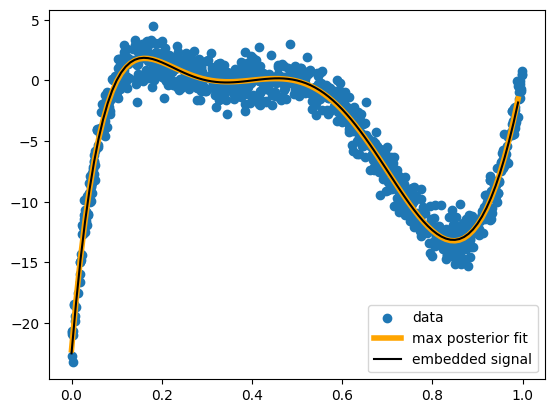

In [171]:
from matplotlib import pyplot as plt
chain = sampler.get_chain()
logp = sampler.get_log_prob()

i = logp[-1,:].argmax()
maxp = chain[-1,i,:]
print(maxp)

xref = numpy.arange(0, 1, .01)

plt.scatter(x, y, label='data')
plt.plot(xref, model(xref, maxp), label='max posterior fit', linewidth=4.0, color='orange')
plt.plot(xref, ref(xref), label='embedded signal', color='black')
plt.legend()

(500, 8)


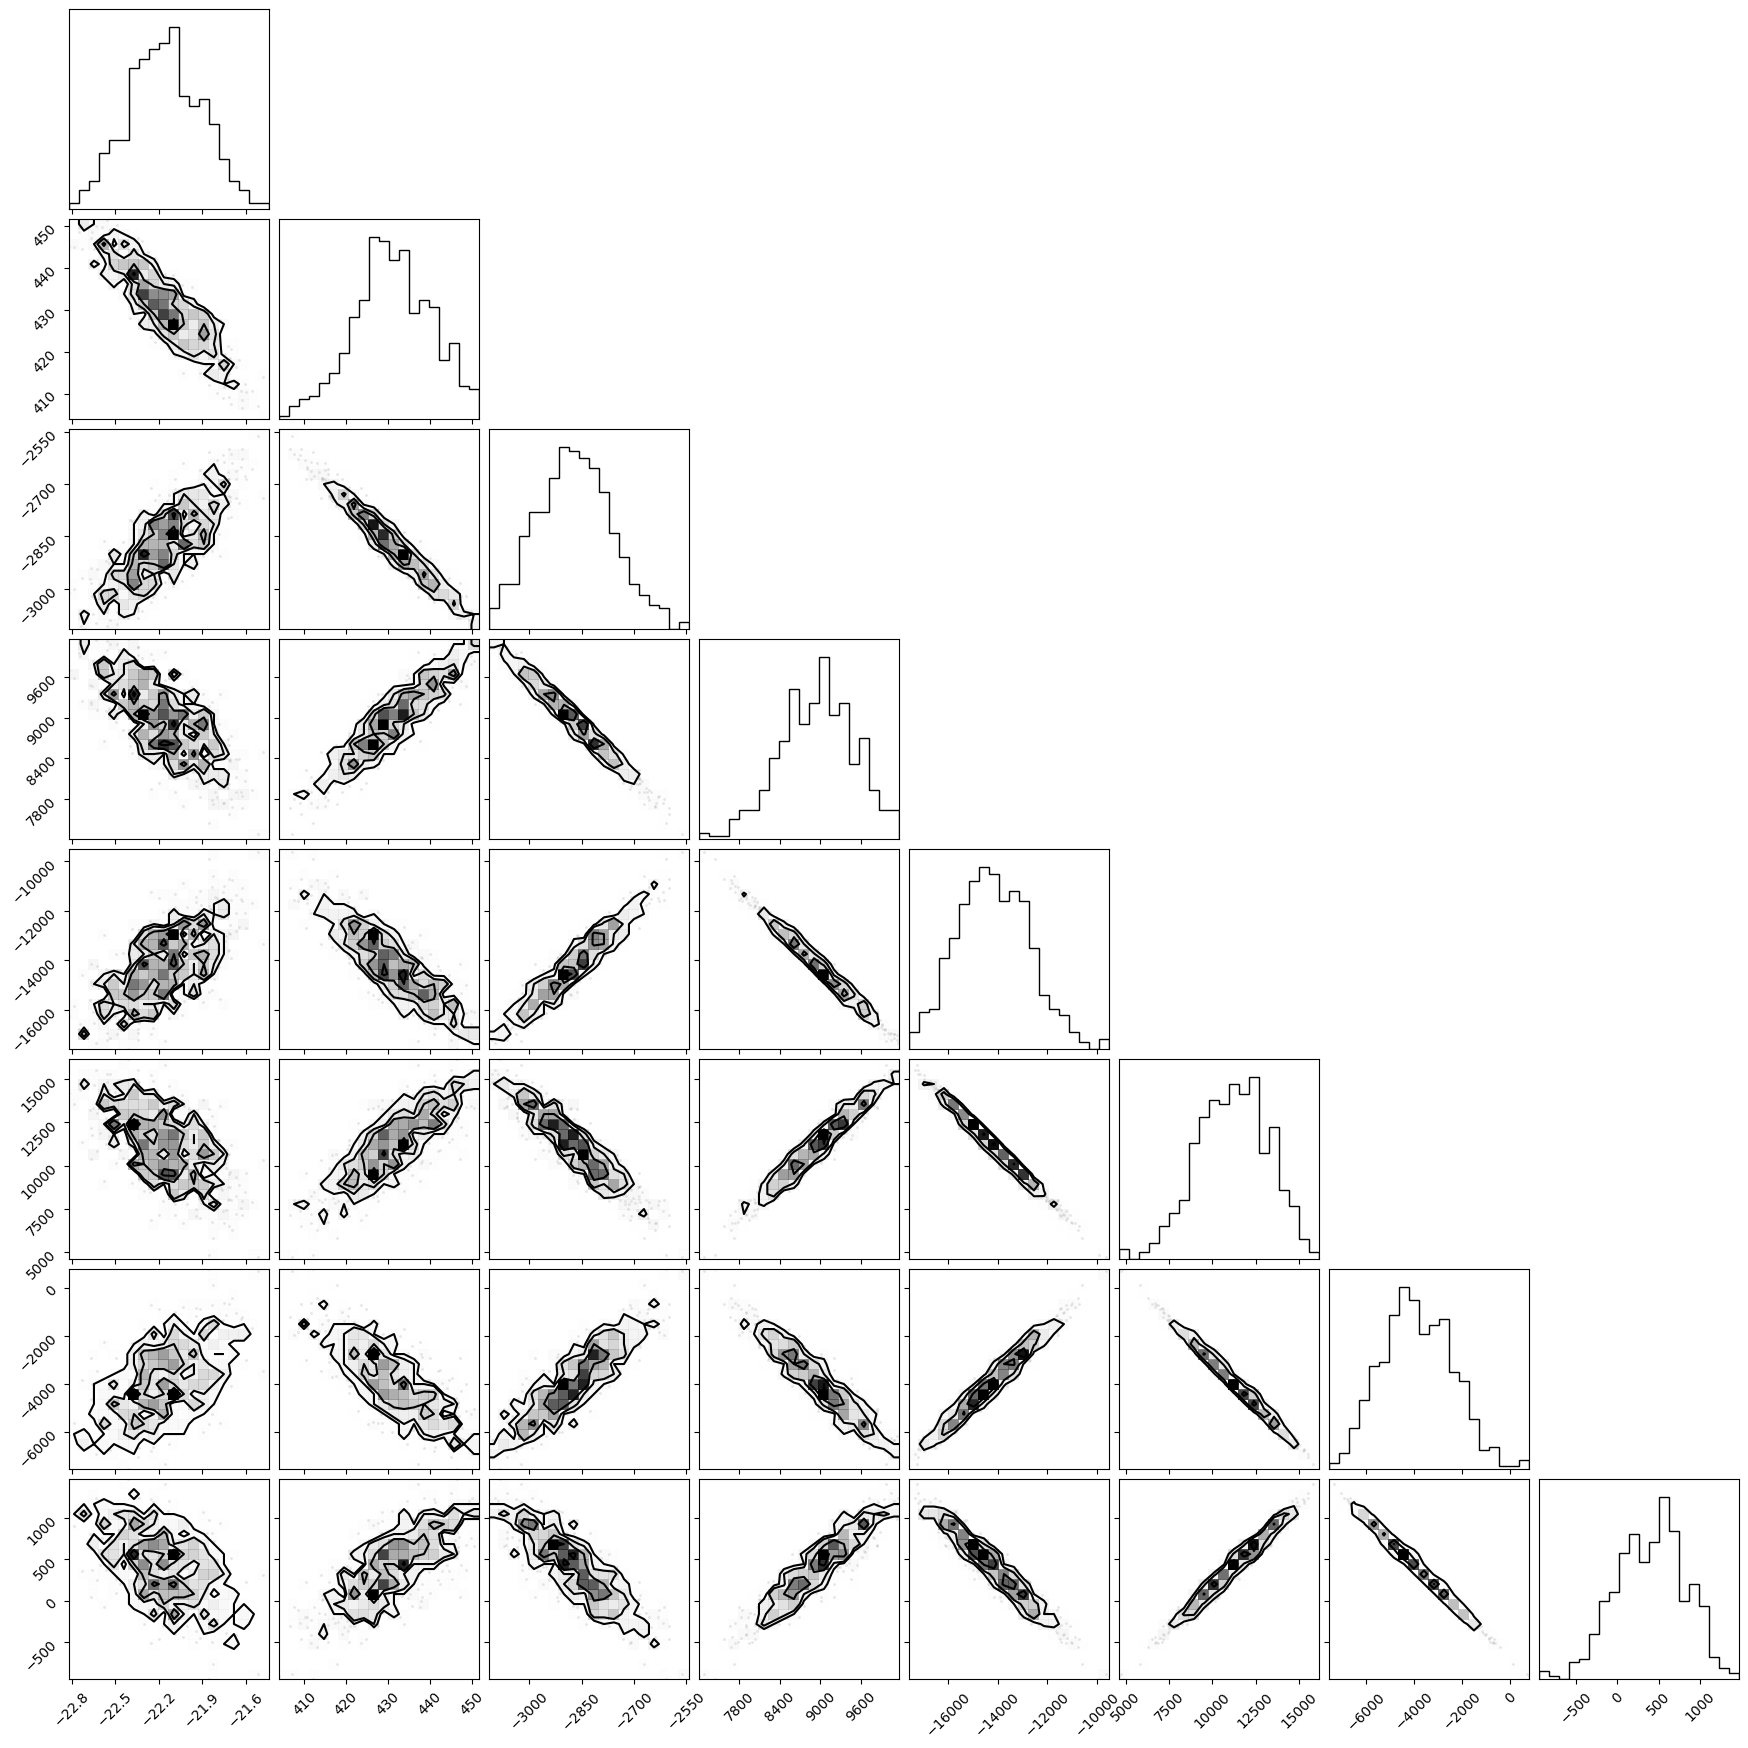

In [172]:
import corner

final = chain[-1,:,:]
print(final.shape)

_ = corner.corner(chain[-1,:,:])